In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
wordcount = pd.read_csv('count_5교통건축국토.csv')
print(wordcount.shape)
wordcount.head()
#주택, 부동산, 아파트 등의 부동산 문제

(1549, 2)


,word,count
0,주택,590
1,부동산,511
2,아파트,435
3,청원,354
4,택시,334


- 주의할점!: 해당 데이터는 2021.06 의 지수 100을 기준으로 하였으므로 지역과 주택유형에 따른 가격의 차이는 전혀 반영되지 않음 증감률만 볼것!

# 유형별 매매가격지수

In [4]:
price1 = pd.read_excel('유형별_매매가격지수_20220325.xlsx')

#2021.06 = 100.0 기준
price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 52 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   주택유형별(1)  96 non-null     object 
 1   지역별(1)    96 non-null     object 
 2   2018.01   96 non-null     float64
 3   2018.02   96 non-null     float64
 4   2018.03   96 non-null     float64
 5   2018.04   96 non-null     float64
 6   2018.05   96 non-null     float64
 7   2018.06   96 non-null     float64
 8   2018.07   96 non-null     float64
 9   2018.08   96 non-null     float64
 10  2018.09   96 non-null     float64
 11  2018.10   96 non-null     float64
 12  2018.11   96 non-null     float64
 13  2018.12   96 non-null     float64
 14  2019.01   96 non-null     float64
 15  2019.02   96 non-null     float64
 16  2019.03   96 non-null     float64
 17  2019.04   96 non-null     float64
 18  2019.05   96 non-null     float64
 19  2019.06   96 non-null     float64
 20  2019.07   96 non-null     float64


In [5]:
a= price1
a['2018 1분기']=(a['2018.01']+a['2018.02']+a['2018.03'])/3
a['2018 2분기']=(a['2018.04']+a['2018.05']+a['2018.06'])/3
a['2018 3분기']=(a['2018.07']+a['2018.08']+a['2018.09'])/3
a['2018 4분기']=(a['2018.10']+a['2018.11']+a['2018.12'])/3

a['2019 1분기']=(a['2019.01']+a['2019.02']+a['2019.03'])/3
a['2019 2분기']=(a['2019.04']+a['2019.05']+a['2019.06'])/3
a['2019 3분기']=(a['2019.07']+a['2019.08']+a['2019.09'])/3
a['2019 4분기']=(a['2019.10']+a['2019.11']+a['2019.12'])/3

a['2020 1분기']=(a['2020.01']+a['2020.02']+a['2020.03'])/3
a['2020 2분기']=(a['2020.04']+a['2020.05']+a['2020.06'])/3
a['2020 3분기']=(a['2020.07']+a['2020.08']+a['2020.09'])/3
a['2020 4분기']=(a['2020.10']+a['2020.11']+a['2020.12'])/3

a['2021 1분기']=(a['2021.01']+a['2021.02']+a['2021.03'])/3
a['2021 2분기']=(a['2021.04']+a['2021.05']+a['2021.06'])/3
a['2021 3분기']=(a['2021.07']+a['2021.08']+a['2021.09'])/3
a['2021 4분기']=(a['2021.10']+a['2021.11']+a['2021.12'])/3


In [10]:
price1= price1[(price1['지역별(1)']=='전국') | (price1['지역별(1)']=='수도권') | (price1['지역별(1)']=='지방') | (price1['지역별(1)']=='9개도')]
price1_분기=price1[['주택유형별(1)','지역별(1)','2018 1분기','2018 2분기','2018 3분기','2018 4분기','2019 1분기','2019 2분기','2019 3분기','2019 4분기',
                       '2020 1분기','2020 2분기','2020 3분기','2020 4분기','2021 1분기','2021 2분기','2021 3분기','2021 4분기']]
price1_분기

,주택유형별(1),지역별(1),2018 1분기,2018 2분기,2018 3분기,2018 4분기,2019 1분기,2019 2분기,2019 3분기,2019 4분기,2020 1분기,2020 2분기,2020 3분기,2020 4분기,2021 1분기,2021 2분기,2021 3분기,2021 4분기
0,종합,전국,89.966667,90.100000,90.200000,90.600000,90.400000,89.933333,89.700000,90.033333,90.966667,91.800000,93.100000,94.433333,96.733333,99.033333,101.833333,104.200000
1,종합,수도권,85.733333,86.266667,86.733333,87.766667,87.600000,87.133333,87.100000,87.800000,89.200000,90.666667,92.233333,93.433333,95.833333,98.733333,102.466667,105.566667
2,종합,지방,93.966667,93.766667,93.400000,93.300000,93.000000,92.566667,92.200000,92.100000,92.566667,92.900000,93.900000,95.333333,97.566667,99.266667,101.233333,103.000000
5,종합,9개도,91.566667,91.500000,91.266667,91.433333,91.066667,90.500000,90.100000,90.100000,90.833333,91.866667,93.100000,94.333333,96.566667,98.966667,102.000000,104.633333
24,아파트,전국,87.966667,87.933333,87.733333,87.900000,87.266667,86.433333,85.866667,86.166667,87.333333,88.533333,90.266667,92.066667,95.300000,98.566667,102.533333,105.700000
25,아파트,수도권,81.833333,82.366667,82.833333,83.866667,83.466667,82.666667,82.433333,83.300000,85.100000,87.100000,89.166667,90.700000,94.000000,98.166667,103.400000,107.333333
26,아파트,지방,94.233333,93.533333,92.566667,91.866667,91.066667,90.100000,89.233333,88.966667,89.500000,89.933333,91.300000,93.300000,96.566667,98.966667,101.700000,104.166667
29,아파트,9개도,89.800000,89.400000,88.700000,88.533333,87.733333,86.633333,85.800000,85.633333,86.700000,88.133333,89.900000,91.533333,94.900000,98.466667,102.933333,106.700000
48,연립다세대,전국,97.833333,98.000000,98.066667,98.300000,98.100000,97.666667,97.333333,97.333333,97.533333,97.633333,98.000000,98.400000,99.033333,99.700000,100.700000,102.133333
49,연립다세대,수도권,95.666667,96.033333,96.366667,96.933333,96.866667,96.533333,96.300000,96.533333,96.900000,97.166667,97.666667,98.133333,98.866667,99.666667,100.766667,102.400000


In [11]:
#전국:0-종합,24-아파트,48-연립다세대,72-단독주택
price1_전국= price1_분기[price1_분기['지역별(1)']=='전국'].transpose()
price1_전국= price1_전국.rename(columns = {0: '종합', 24: '아파트', 48:'연립다세대',72:'단독주택'}) 
price1_전국= price1_전국.drop(['주택유형별(1)','지역별(1)'])
price1_전국.index.name ='연도및분기'
price1_전국=price1_전국.reset_index()

#dealprice_전국=dealprice_전국.index.name ='연도및분기'
#dealprice_전국=dealprice_전국.reset_index()
a=price1_전국
a


,연도및분기,종합,아파트,연립다세대,단독주택
0,2018 1분기,89.966667,87.966667,97.833333,90.6
1,2018 2분기,90.1,87.933333,98.0,91.233333
2,2018 3분기,90.2,87.733333,98.066667,92.0
3,2018 4분기,90.6,87.9,98.3,93.166667
4,2019 1분기,90.4,87.266667,98.1,94.0
5,2019 2분기,89.933333,86.433333,97.666667,94.6
6,2019 3분기,89.7,85.866667,97.333333,95.3
7,2019 4분기,90.033333,86.166667,97.333333,95.9
8,2020 1분기,90.966667,87.333333,97.533333,96.466667
9,2020 2분기,91.8,88.533333,97.633333,96.933333


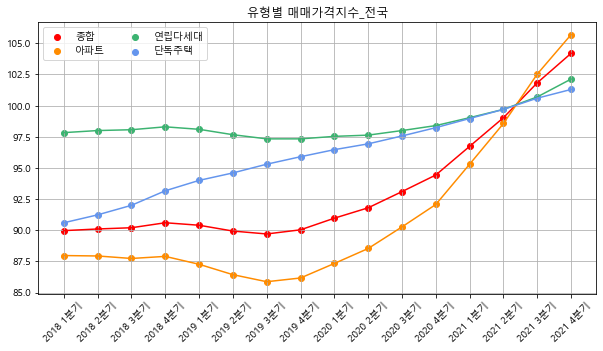

In [12]:
a = price1_전국
plt.figure(figsize=(10, 5))
plt.plot(a["연도및분기"],a["종합"], color='red')
plt.plot(a["연도및분기"],a["아파트"], color='darkorange')
plt.plot(a["연도및분기"],a["연립다세대"], color='mediumseagreen')
plt.plot(a["연도및분기"],a["단독주택"], color='cornflowerblue')
plt.scatter(a["연도및분기"],a["종합"], color='red', label="종합")
plt.scatter(a["연도및분기"],a["아파트"], color='darkorange', label="아파트")
plt.scatter(a["연도및분기"],a["연립다세대"], color='mediumseagreen', label="연립다세대")
plt.scatter(a["연도및분기"],a["단독주택"], color='cornflowerblue', label="단독주택")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("유형별 매매가격지수_전국")

plt.show()

In [94]:
#전국:1-종합,25-아파트,49-연립다세대,73-단독주택
dealprice_수도권= dealprice_분기[dealprice_분기['지역별(1)']=='수도권'].transpose()
dealprice_수도권= dealprice_수도권.rename(columns = {1: '종합', 25: '아파트', 49:'연립다세대',73:'단독주택'}) 
dealprice_수도권= dealprice_수도권.drop(['주택유형별(1)','지역별(1)'])
dealprice_수도권.index.name ='연도및분기'
dealprice_수도권=dealprice_수도권.reset_index()

#dealprice_전국=dealprice_전국.index.name ='연도및분기'
#dealprice_전국=dealprice_전국.reset_index()
dealprice_수도권

,연도및분기,종합,아파트,연립다세대,단독주택
0,2018 1분기,85.733333,81.833333,95.666667,86.9
1,2018 2분기,86.266667,82.366667,96.033333,87.6
2,2018 3분기,86.733333,82.833333,96.366667,88.633333
3,2018 4분기,87.766667,83.866667,96.933333,90.166667
4,2019 1분기,87.6,83.466667,96.866667,91.2
5,2019 2분기,87.133333,82.666667,96.533333,91.933333
6,2019 3분기,87.1,82.433333,96.3,92.933333
7,2019 4분기,87.8,83.3,96.533333,94.0
8,2020 1분기,89.2,85.1,96.9,95.033333
9,2020 2분기,90.666667,87.1,97.166667,95.9


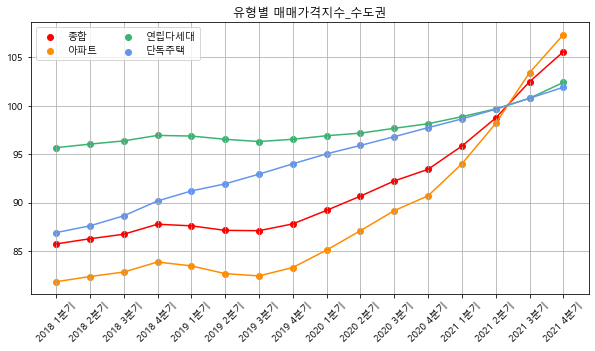

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(dealprice_수도권["연도및분기"],dealprice_수도권["종합"], color='red')
plt.plot(dealprice_수도권["연도및분기"],dealprice_수도권["아파트"], color='darkorange')
plt.plot(dealprice_수도권["연도및분기"],dealprice_수도권["연립다세대"], color='mediumseagreen')
plt.plot(dealprice_수도권["연도및분기"],dealprice_수도권["단독주택"], color='cornflowerblue')
plt.scatter(dealprice_수도권["연도및분기"],dealprice_수도권["종합"], color='red', label="종합")
plt.scatter(dealprice_수도권["연도및분기"],dealprice_수도권["아파트"], color='darkorange', label="아파트")
plt.scatter(dealprice_수도권["연도및분기"],dealprice_수도권["연립다세대"], color='mediumseagreen', label="연립다세대")
plt.scatter(dealprice_수도권["연도및분기"],dealprice_수도권["단독주택"], color='cornflowerblue', label="단독주택")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("유형별 매매가격지수_수도권")

plt.show()

In [13]:
#전국:0-종합,24-아파트,48-연립다세대,72-단독주택
price1_종합= price1_분기[price1_분기['주택유형별(1)']=='종합'].transpose()
price1_종합= price1_종합.rename(columns = {0: '전국', 1: '수도권', 2:'지방',5:'9개도'})
price1_종합= price1_종합.drop(['주택유형별(1)','지역별(1)'])
price1_종합.index.name ='연도및분기'
price1_종합=price1_종합.reset_index()


#dealprice_전국=dealprice_전국.index.name ='연도및분기'
#dealprice_전국=dealprice_전국.reset_index()
price1_종합

,연도및분기,전국,수도권,지방,9개도
0,2018 1분기,89.966667,85.733333,93.966667,91.566667
1,2018 2분기,90.1,86.266667,93.766667,91.5
2,2018 3분기,90.2,86.733333,93.4,91.266667
3,2018 4분기,90.6,87.766667,93.3,91.433333
4,2019 1분기,90.4,87.6,93.0,91.066667
5,2019 2분기,89.933333,87.133333,92.566667,90.5
6,2019 3분기,89.7,87.1,92.2,90.1
7,2019 4분기,90.033333,87.8,92.1,90.1
8,2020 1분기,90.966667,89.2,92.566667,90.833333
9,2020 2분기,91.8,90.666667,92.9,91.866667


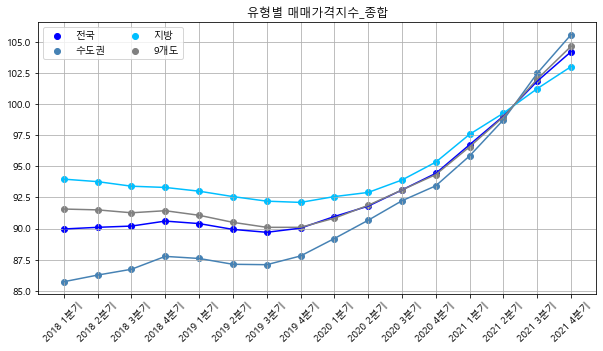

In [14]:
a=price1_종합
plt.figure(figsize=(10, 5))
plt.plot(a["연도및분기"],a["전국"], color='b')
plt.plot(a["연도및분기"],a["수도권"], color='steelblue')
plt.plot(a["연도및분기"],a["지방"], color='deepskyblue')
plt.plot(a["연도및분기"],a["9개도"], color='gray')
plt.scatter(a["연도및분기"],a["전국"], color='b', label="전국")
plt.scatter(a["연도및분기"],a["수도권"], color='steelblue', label="수도권")
plt.scatter(a["연도및분기"],a["지방"], color='deepskyblue', label="지방")
plt.scatter(a["연도및분기"],a["9개도"], color='gray', label="9개도")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("유형별 매매가격지수_종합")

plt.show()

# 유형별 전세가격지수

In [91]:
price2 = pd.read_excel('유형별_전세가격지수_20220325.xlsx')

a= price2
a['2018 1분기']=(a['2018.01']+a['2018.02']+a['2018.03'])/3
a['2018 2분기']=(a['2018.04']+a['2018.05']+a['2018.06'])/3
a['2018 3분기']=(a['2018.07']+a['2018.08']+a['2018.09'])/3
a['2018 4분기']=(a['2018.10']+a['2018.11']+a['2018.12'])/3

a['2019 1분기']=(a['2019.01']+a['2019.02']+a['2019.03'])/3
a['2019 2분기']=(a['2019.04']+a['2019.05']+a['2019.06'])/3
a['2019 3분기']=(a['2019.07']+a['2019.08']+a['2019.09'])/3
a['2019 4분기']=(a['2019.10']+a['2019.11']+a['2019.12'])/3

a['2020 1분기']=(a['2020.01']+a['2020.02']+a['2020.03'])/3
a['2020 2분기']=(a['2020.04']+a['2020.05']+a['2020.06'])/3
a['2020 3분기']=(a['2020.07']+a['2020.08']+a['2020.09'])/3
a['2020 4분기']=(a['2020.10']+a['2020.11']+a['2020.12'])/3

a['2021 1분기']=(a['2021.01']+a['2021.02']+a['2021.03'])/3
a['2021 2분기']=(a['2021.04']+a['2021.05']+a['2021.06'])/3
a['2021 3분기']=(a['2021.07']+a['2021.08']+a['2021.09'])/3
a['2021 4분기']=(a['2021.10']+a['2021.11']+a['2021.12'])/3

price2= price2[(price2['지역별(1)']=='전국') | (dealprice['지역별(1)']=='수도권') | (dealprice['지역별(1)']=='지방') | (dealprice['지역별(1)']=='9개도')]
price2_분기=price2[['주택유형별(1)','지역별(1)','2018 1분기','2018 2분기','2018 3분기','2018 4분기','2019 1분기','2019 2분기','2019 3분기','2019 4분기',
                       '2020 1분기','2020 2분기','2020 3분기','2020 4분기','2021 1분기','2021 2분기','2021 3분기','2021 4분기']]
price2_분기.head()


,주택유형별(1),지역별(1),2018 1분기,2018 2분기,2018 3분기,2018 4분기,2019 1분기,2019 2분기,2019 3분기,2019 4분기,2020 1분기,2020 2분기,2020 3분기,2020 4분기,2021 1분기,2021 2분기,2021 3분기,2021 4분기
0,종합,전국,95.366667,94.833333,94.233333,93.966667,93.366667,92.700000,92.233333,92.433333,93.066667,93.466667,94.433333,96.033333,98.133333,99.433333,101.200000,102.866667
1,종합,수도권,93.466667,92.866667,92.433333,92.333333,91.700000,90.900000,90.633333,91.200000,92.166667,92.766667,93.966667,95.833333,97.933333,99.366667,101.633333,103.666667
2,종합,지방,97.100000,96.600000,95.900000,95.366667,94.933333,94.300000,93.733333,93.533333,93.900000,94.100000,94.800000,96.233333,98.333333,99.533333,100.866667,102.133333
5,종합,9개도,97.466667,96.800000,95.933333,95.400000,94.766667,93.900000,93.266667,93.333333,93.800000,94.166667,95.133333,96.566667,98.333333,99.500000,101.266667,103.033333
24,아파트,전국,92.766667,91.900000,90.966667,90.566667,89.766667,88.766667,88.166667,88.533333,89.466667,90.100000,91.533333,94.000000,97.166667,99.166667,101.766667,104.000000


In [99]:
#전국:0-종합,24-아파트,48-연립다세대,72-단독주택
price2_전국= price2_분기[price2_분기['지역별(1)']=='전국'].transpose()
price2_전국= price2_전국.rename(columns = {0: '종합', 24: '아파트', 48:'연립다세대',72:'단독주택'}) 
price2_전국= price2_전국.drop(['주택유형별(1)','지역별(1)'])
price2_전국.index.name ='연도및분기'
price2_전국=price2_전국.reset_index()


price2_전국

,연도및분기,종합,아파트,연립다세대,단독주택
0,2018 1분기,95.366667,92.766667,99.633333,99.8
1,2018 2분기,94.833333,91.9,99.5,99.8
2,2018 3분기,94.233333,90.966667,99.333333,99.7
3,2018 4분기,93.966667,90.566667,99.2,99.7
4,2019 1분기,93.366667,89.766667,98.9,99.666667
5,2019 2분기,92.7,88.766667,98.566667,99.6
6,2019 3분기,92.233333,88.166667,98.233333,99.5
7,2019 4분기,92.433333,88.533333,98.2,99.5
8,2020 1분기,93.066667,89.466667,98.3,99.5
9,2020 2분기,93.466667,90.1,98.3,99.466667


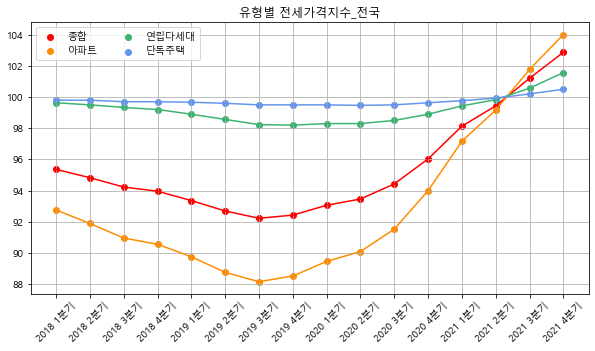

In [101]:
a = price2_전국
plt.figure(figsize=(10, 5))
plt.plot(a["연도및분기"],a["종합"], color='red')
plt.plot(a["연도및분기"],a["아파트"], color='darkorange')
plt.plot(a["연도및분기"],a["연립다세대"], color='mediumseagreen')
plt.plot(a["연도및분기"],a["단독주택"], color='cornflowerblue')
plt.scatter(a["연도및분기"],a["종합"], color='red', label="종합")
plt.scatter(a["연도및분기"],a["아파트"], color='darkorange', label="아파트")
plt.scatter(a["연도및분기"],a["연립다세대"], color='mediumseagreen', label="연립다세대")
plt.scatter(a["연도및분기"],a["단독주택"], color='cornflowerblue', label="단독주택")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("유형별 전세가격지수_전국")

plt.show()

In [136]:
#전국:0-종합,24-아파트,48-연립다세대,72-단독주택

aa=price2_분기

price2_종합= aa[aa['주택유형별(1)']=='종합'].transpose()


price2_종합= price2_종합.rename(columns = {0: '전국', 1: '수도권', 2:'지방',5:'9개도'})
price2_종합= price2_종합.drop(['주택유형별(1)','지역별(1)'])
price2_종합.index.name ="연도및분기"
price2_종합=price2_종합.reset_index()
price2_종합

,연도및분기,전국,수도권,지방,9개도
0,2018 1분기,95.366667,93.466667,97.1,97.466667
1,2018 2분기,94.833333,92.866667,96.6,96.8
2,2018 3분기,94.233333,92.433333,95.9,95.933333
3,2018 4분기,93.966667,92.333333,95.366667,95.4
4,2019 1분기,93.366667,91.7,94.933333,94.766667
5,2019 2분기,92.7,90.9,94.3,93.9
6,2019 3분기,92.233333,90.633333,93.733333,93.266667
7,2019 4분기,92.433333,91.2,93.533333,93.333333
8,2020 1분기,93.066667,92.166667,93.9,93.8
9,2020 2분기,93.466667,92.766667,94.1,94.166667


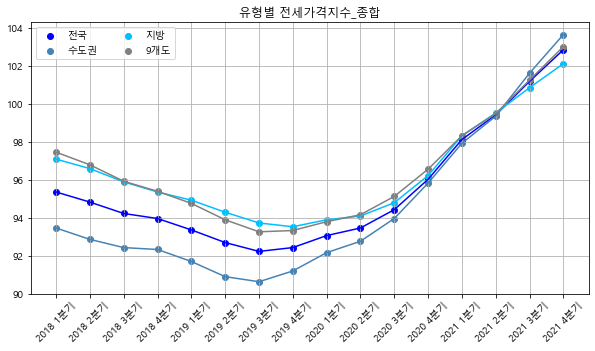

In [137]:
a=price2_종합
plt.figure(figsize=(10, 5))
plt.plot(a["연도및분기"],a["전국"], color='b')
plt.plot(a["연도및분기"],a["수도권"], color='steelblue')
plt.plot(a["연도및분기"],a["지방"], color='deepskyblue')
plt.plot(a["연도및분기"],a["9개도"], color='gray')
plt.scatter(a["연도및분기"],a["전국"], color='b', label="전국")
plt.scatter(a["연도및분기"],a["수도권"], color='steelblue', label="수도권")
plt.scatter(a["연도및분기"],a["지방"], color='deepskyblue', label="지방")
plt.scatter(a["연도및분기"],a["9개도"], color='gray', label="9개도")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("유형별 전세가격지수_종합")

plt.show()

# 유형별 월세가격지수

In [116]:
price3 = pd.read_excel('유형별_월세가격지수_20220325.xlsx')
a = price3

a['2018 1분기']=(a['2018.01']+a['2018.02']+a['2018.03'])/3
a['2018 2분기']=(a['2018.04']+a['2018.05']+a['2018.06'])/3
a['2018 3분기']=(a['2018.07']+a['2018.08']+a['2018.09'])/3
a['2018 4분기']=(a['2018.10']+a['2018.11']+a['2018.12'])/3

a['2019 1분기']=(a['2019.01']+a['2019.02']+a['2019.03'])/3
a['2019 2분기']=(a['2019.04']+a['2019.05']+a['2019.06'])/3
a['2019 3분기']=(a['2019.07']+a['2019.08']+a['2019.09'])/3
a['2019 4분기']=(a['2019.10']+a['2019.11']+a['2019.12'])/3

a['2020 1분기']=(a['2020.01']+a['2020.02']+a['2020.03'])/3
a['2020 2분기']=(a['2020.04']+a['2020.05']+a['2020.06'])/3
a['2020 3분기']=(a['2020.07']+a['2020.08']+a['2020.09'])/3
a['2020 4분기']=(a['2020.10']+a['2020.11']+a['2020.12'])/3

a['2021 1분기']=(a['2021.01']+a['2021.02']+a['2021.03'])/3
a['2021 2분기']=(a['2021.04']+a['2021.05']+a['2021.06'])/3
a['2021 3분기']=(a['2021.07']+a['2021.08']+a['2021.09'])/3
a['2021 4분기']=(a['2021.10']+a['2021.11']+a['2021.12'])/3

a= a[(a['지역별(1)']=='전국') | (a['지역별(1)']=='수도권') | (a['지역별(1)']=='지방') | (a['지역별(1)']=='9개도')]
price3_분기=a[['주택유형별(1)','지역별(1)','2018 1분기','2018 2분기','2018 3분기','2018 4분기','2019 1분기','2019 2분기','2019 3분기','2019 4분기',
                       '2020 1분기','2020 2분기','2020 3분기','2020 4분기','2021 1분기','2021 2분기','2021 3분기','2021 4분기']]
price3_분기.head()

,주택유형별(1),지역별(1),2018 1분기,2018 2분기,2018 3분기,2018 4분기,2019 1분기,2019 2분기,2019 3분기,2019 4분기,2020 1분기,2020 2분기,2020 3분기,2020 4분기,2021 1분기,2021 2분기,2021 3분기,2021 4분기
0,종합,전국,101.000000,100.833333,100.600000,100.3,100.166667,100.000000,99.766667,99.566667,99.466667,99.400000,99.400000,99.466667,99.766667,99.933333,100.400000,101.100000
1,종합,수도권,100.400000,100.400000,100.400000,100.3,100.300000,100.266667,100.066667,99.900000,99.733333,99.666667,99.600000,99.633333,99.800000,99.933333,100.500000,101.333333
2,종합,지방,101.500000,101.200000,100.733333,100.3,100.000000,99.700000,99.433333,99.266667,99.200000,99.166667,99.200000,99.333333,99.700000,99.933333,100.366667,100.866667
5,종합,9개도,101.566667,101.366667,101.066667,100.7,100.566667,100.300000,100.033333,99.833333,99.700000,99.600000,99.600000,99.633333,99.833333,99.933333,100.433333,101.100000
24,아파트,전국,101.100000,100.900000,100.566667,100.2,100.033333,99.800000,99.500000,99.300000,99.133333,99.100000,99.033333,99.233333,99.633333,99.900000,100.600000,101.600000


In [117]:
price3_전국= price3_분기[price3_분기['지역별(1)']=='전국'].transpose()
price3_전국= price3_전국.rename(columns = {0: '종합', 24: '아파트', 48:'연립다세대',72:'단독주택'}) 
price3_전국= price3_전국.drop(['주택유형별(1)','지역별(1)'])
price3_전국.index.name ='연도및분기'
price3_전국=price3_전국.reset_index()


price3_전국

,연도및분기,종합,아파트,연립다세대,단독주택
0,2018 1분기,101.0,101.1,101.033333,100.8
1,2018 2분기,100.833333,100.9,100.9,100.666667
2,2018 3분기,100.6,100.566667,100.733333,100.533333
3,2018 4분기,100.3,100.2,100.566667,100.4
4,2019 1분기,100.166667,100.033333,100.4,100.3
5,2019 2분기,100.0,99.8,100.233333,100.233333
6,2019 3분기,99.766667,99.5,100.066667,100.133333
7,2019 4분기,99.566667,99.3,99.966667,100.033333
8,2020 1분기,99.466667,99.133333,99.9,100.0
9,2020 2분기,99.4,99.1,99.833333,99.966667


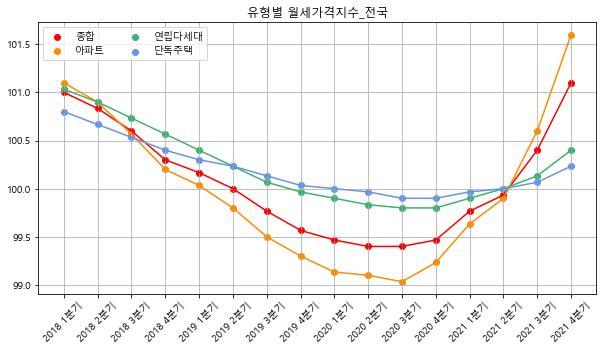

In [123]:
a = price3_전국
plt.figure(figsize=(10, 5))
plt.plot(a["연도및분기"],a["종합"], color='red')
plt.plot(a["연도및분기"],a["아파트"], color='darkorange')
plt.plot(a["연도및분기"],a["연립다세대"], color='mediumseagreen')
plt.plot(a["연도및분기"],a["단독주택"], color='cornflowerblue')
plt.scatter(a["연도및분기"],a["종합"], color='red', label="종합")
plt.scatter(a["연도및분기"],a["아파트"], color='darkorange', label="아파트")
plt.scatter(a["연도및분기"],a["연립다세대"], color='mediumseagreen', label="연립다세대")
plt.scatter(a["연도및분기"],a["단독주택"], color='cornflowerblue', label="단독주택")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("유형별 월세가격지수_전국")

plt.show()

In [134]:
aa=price3_분기

price3_종합= aa[aa['주택유형별(1)']=='종합'].transpose()

price3_종합= price3_종합.rename(columns = {0: '전국', 1: '수도권', 2:'지방',5:'9개도'})
price3_종합= price3_종합.drop(['주택유형별(1)','지역별(1)'])
price3_종합.index.name ="연도및분기"
price3_종합=price3_종합.reset_index()
price3_종합

,연도및분기,전국,수도권,지방,9개도
0,2018 1분기,101.0,100.4,101.5,101.566667
1,2018 2분기,100.833333,100.4,101.2,101.366667
2,2018 3분기,100.6,100.4,100.733333,101.066667
3,2018 4분기,100.3,100.3,100.3,100.7
4,2019 1분기,100.166667,100.3,100.0,100.566667
5,2019 2분기,100.0,100.266667,99.7,100.3
6,2019 3분기,99.766667,100.066667,99.433333,100.033333
7,2019 4분기,99.566667,99.9,99.266667,99.833333
8,2020 1분기,99.466667,99.733333,99.2,99.7
9,2020 2분기,99.4,99.666667,99.166667,99.6


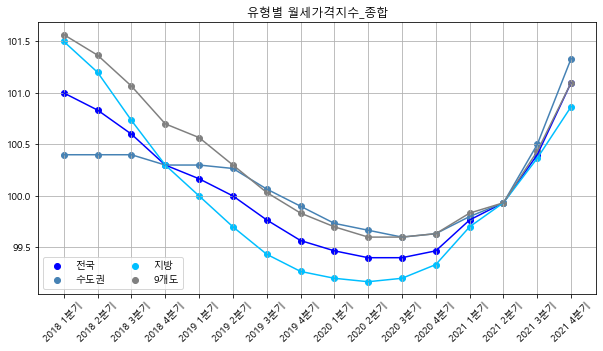

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(a["연도및분기"],a["전국"], color='b')
plt.plot(a["연도및분기"],a["수도권"], color='steelblue')
plt.plot(a["연도및분기"],a["지방"], color='deepskyblue')
plt.plot(a["연도및분기"],a["9개도"], color='gray')
plt.scatter(a["연도및분기"],a["전국"], color='b', label="전국")
plt.scatter(a["연도및분기"],a["수도권"], color='steelblue', label="수도권")
plt.scatter(a["연도및분기"],a["지방"], color='deepskyblue', label="지방")
plt.scatter(a["연도및분기"],a["9개도"], color='gray', label="9개도")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("유형별 월세가격지수_종합")

plt.show()

# 전세,월세,매매 비교-전국,종합

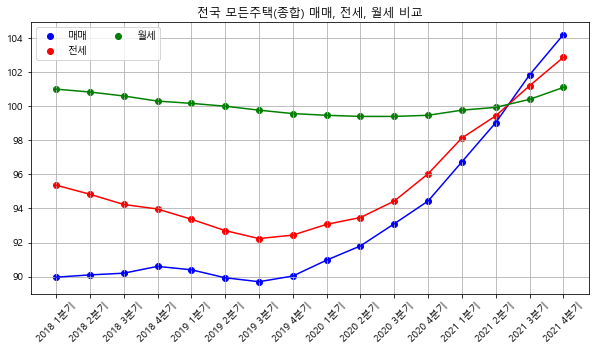

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(price1_종합["연도및분기"],price1_종합["전국"], color='b')
plt.plot(price2_종합["연도및분기"],price2_종합["전국"], color='r')
plt.plot(price3_종합["연도및분기"],price3_종합["전국"], color='g')
plt.scatter(price1_종합["연도및분기"],price1_종합["전국"], color='b',label="매매")
plt.scatter(price2_종합["연도및분기"],price2_종합["전국"], color='r',label="전세")
plt.scatter(price3_종합["연도및분기"],price3_종합["전국"], color='g',label="월세")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("전국 모든주택(종합) 매매, 전세, 월세 비교")

plt.show()

# 소득계층별 점유형태

In [9]:
house = pd.read_excel('일반가구_지역별_소득계층별_점유형태_20220327.xlsx')

house.head()

,시도구분(1),소득구분(1),연도,자가,Unnamed: 4,전세,보증부 월세,월세,사글세,무상,계
0,전국,전체,2016,56.8,NaN,15.5,20.3,2.7,0.7,4.0,100.0
1,전국,저소득층,2016,46.2,NaN,12.9,28.7,5.2,1.4,5.6,100.0
2,전국,중소득층,2016,59.4,NaN,18.1,17.8,1.1,0.3,3.4,100.0
3,전국,고소득층,2016,73.6,NaN,15.9,7.6,0.6,0.1,2.2,100.0
4,수도권,전체,2016,48.9,NaN,22.1,22.5,2.7,0.0,3.7,100.0


In [12]:
#전국데이터만! 자가와 자가X데이터만!
house1= house[house['시도구분(1)']=='전국']
house1['자가X']=100-house1['자가']
house1=house1[['소득구분(1)','연도','자가','자가X']]
house1

,소득구분(1),연도,자가,자가X
0,전체,2016,56.8,43.2
1,저소득층,2016,46.2,53.8
2,중소득층,2016,59.4,40.6
3,고소득층,2016,73.6,26.4
16,전체,2017,57.7,42.3
17,저소득층,2017,47.5,52.5
18,중소득층,2017,60.2,39.8
19,고소득층,2017,73.5,26.5
32,전체,2018,57.7,42.3
33,저소득층,2018,47.2,52.8


In [27]:

low=house1.loc[(house1['소득구분(1)']=='저소득층'),'자가X'].values.tolist()
print(low)
middle=house1.loc[(house1['소득구분(1)']=='중소득층'),'자가X'].values.tolist()
print(middle)
high=house1.loc[(house1['소득구분(1)']=='고소득층'),'자가X'].values.tolist()
print(high)
a=house1.loc[(house1['소득구분(1)']=='전체'),'자가X'].values.tolist()
print(a)
year=[2016,2017,2018,2019,2020]
'''
low=house1.loc[(house1['소득구분(1)']=='저소득층'),'자가'].values.tolist()
print(low)
middle=house1.loc[(house1['소득구분(1)']=='중소득층'),'자가'].values.tolist()
print(middle)
high=house1.loc[(house1['소득구분(1)']=='고소득층'),'자가'].values.tolist()
print(high)
a=house1.loc[(house1['소득구분(1)']=='전체'),'자가'].values.tolist()
print(a)
year=[2016,2017,2018,2019,2020]
'''

[53.8, 52.5, 52.8, 53.6, 54.6]
[40.6, 39.8, 39.9, 40.4, 38.3]
[26.400000000000006, 26.5, 24.799999999999997, 23.900000000000006, 24.700000000000003]
[43.2, 42.3, 42.3, 42.0, 42.1]


"\nlow=house1.loc[(house1['소득구분(1)']=='저소득층'),'자가'].values.tolist()\nprint(low)\nmiddle=house1.loc[(house1['소득구분(1)']=='중소득층'),'자가'].values.tolist()\nprint(middle)\nhigh=house1.loc[(house1['소득구분(1)']=='고소득층'),'자가'].values.tolist()\nprint(high)\na=house1.loc[(house1['소득구분(1)']=='전체'),'자가'].values.tolist()\nprint(a)\nyear=[2016,2017,2018,2019,2020]\n"

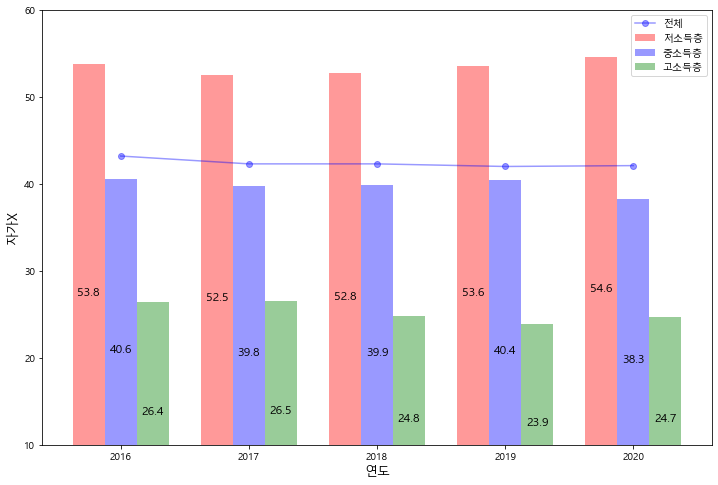

In [57]:
# 그림 사이즈, 바 굵기 조정
fig, ax1 = plt.subplots(figsize=(12,8))
bar_width = 0.25


# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = ax1.bar(index, low, bar_width, alpha=0.4, color='red', label='저소득층')

b2 = ax1.bar(index + bar_width, middle, bar_width, alpha=0.4, color='blue', label='중소득층')

b3 = ax1.bar(index + 2 * bar_width, high, bar_width, alpha=0.4, color='green', label='고소득층')

b4 = ax1.plot(index + bar_width, a, alpha=0.4, color='b', marker='o',label='전체')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 5 + bar_width, 1), year)

for rect in b1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height/2, '%.1f' % height, ha='center', va='bottom', size = 12)
for rect in b2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height/2, '%.1f' % height, ha='center', va='bottom', size = 12)
for rect in b3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height/2, '%.1f' % height, ha='center', va='bottom', size = 12)
#for i in range(len(index + bar_width)):
#    height = a[i]
#    plt.text(index + bar_width[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)    
# x축, y축 이름 및 범례 설정

plt.xlabel('연도', size = 13)
plt.ylabel('자가X', size = 13)
plt.ylim([10, 60])  
#ax2 = ax1.twinx()
#ax2.plot(a,year, color='b',label="전체")
plt.legend()
plt.show()